# Security of models
---

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [9]:
from image_processing_workshop.utils import get_image_from_url
from image_processing_workshop.visual import plot_image, plot_classify
from image_processing_workshop.utils import get_imagenet_category_names
from torchvision import datasets, transforms
from torchvision import models
import torch
import os

os.environ["TORCH_HOME"] = "./"

In [142]:
transformation = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])

In [141]:
resnet18 = models.resnet18(pretrained=True)
resnet18.fc = torch.nn.Sequential(
    resnet18.fc, 
    torch.nn.Softmax(dim=1))

info = resnet18.eval()

## Classification to Imagenet categories

In [140]:
url1 = 'http://british-samoyed-club.co.uk/bsc/wp-content/uploads/scooter.jpg'
url2 = 'https://static.dezeen.com/uploads/2017/12/best-residential-interiors-2017-roundups-slideshow_dezeen_2364_col_9-852x609.jpg'
url3 = 'https://greenglobaltravel.com/wp-content/uploads/Guanaco_Patagonia-edited.jpg'

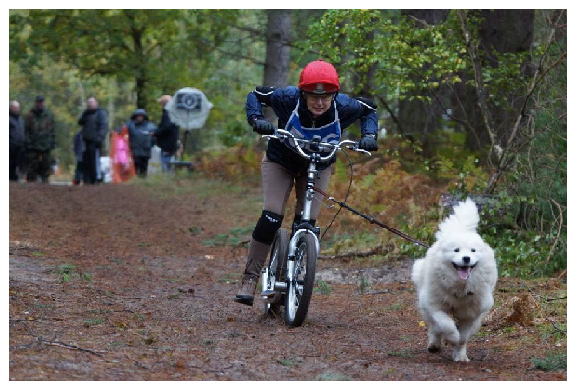

In [215]:
img = get_image_from_url(url1, resize=[600])
plot_image(img)

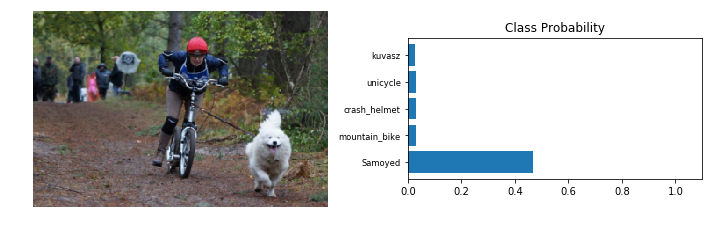

In [216]:
transformed_img = transformation(img)
plot_classify(transformed_img, resnet18, topn=5, category_names=get_imagenet_category_names(), figsize=(10,10))

## Patch the image

In [199]:
from image_processing_workshop.utils import get_patch, apply_patch

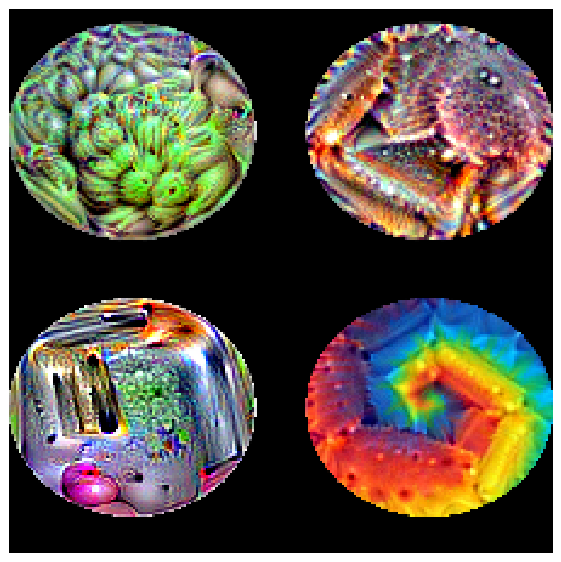

In [218]:
patches = get_patch()
plot_image(patches)

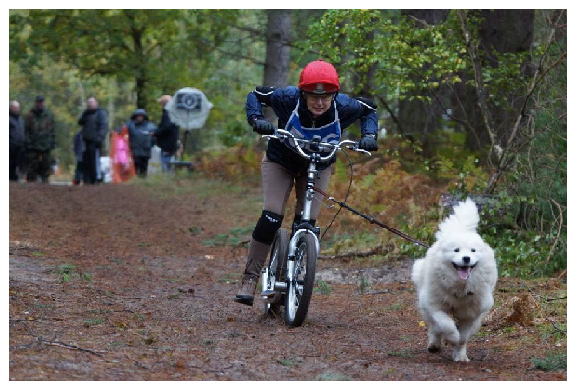

In [217]:
img = get_image_from_url(url1, resize=[600])
plot_image(img)

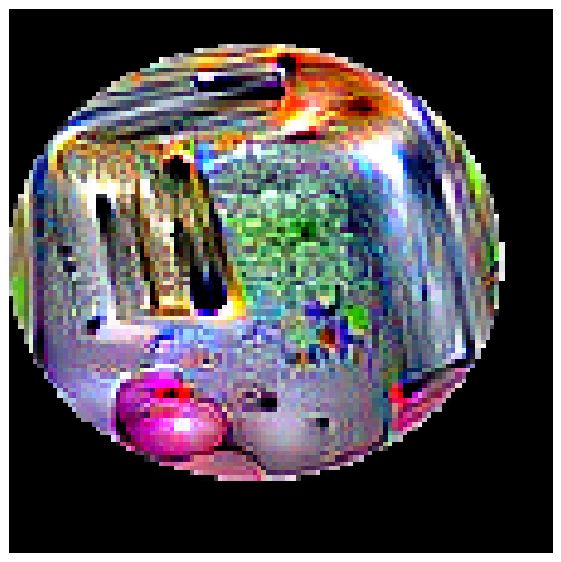

In [251]:
patch = get_patch(2, resize=[250])
plot_image(patch)

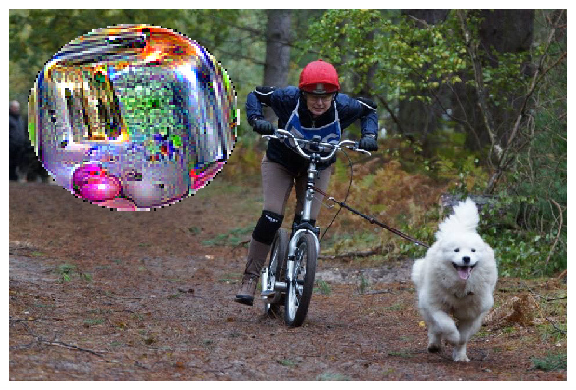

In [252]:
img_patched = apply_patch(img, patch, pos_w=20, pos_h=0)
plot_image(img_patched)

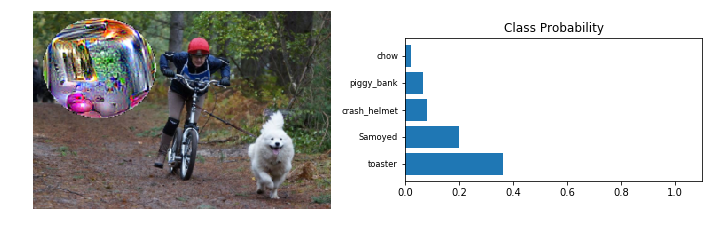

In [253]:
transformed_img = transformation(img_patched)
plot_classify(transformed_img, resnet18, topn=5, category_names=get_imagenet_category_names(), figsize=(10,10))